In [69]:
import pandas as pd
import seaborn as sns
import glob
import numpy as np
import matplotlib.pyplot as plt

In [76]:
path = r'/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/data/UK_carbon_scenario_data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for i, filename in enumerate(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    df['iteration'] = i
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,...,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,iteration
0,0,324474.48,223285.60,23300.555309,29579.745224,3154.551065,1.656049e+05,10339.23,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,18.08,1.306110e+10,89.525413,1190.849248,0
1,1,228543.54,205369.19,23464.752699,29595.668288,3122.286319,1.656049e+05,1884.71,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,18.08,7.370056e+09,55.717430,930.009684,0
2,2,372217.50,174227.39,21601.843042,29224.130128,1658.945670,1.656049e+05,13192.97,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,18.08,1.788284e+10,93.655582,1185.940619,0
3,3,348919.02,224337.88,23278.203832,29656.706700,3188.160175,1.656049e+05,13192.97,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,18.08,3.516027e+10,109.994267,1250.461151,0
4,4,127922.58,154189.83,22191.845222,29595.668288,3116.600720,1.484594e+05,0.00,0,31912.0,...,8862.6,6983.8,3377.8,9361.0,971.5,18.08,2.105223e+10,41.437917,603.741716,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5299,131,32072.04,0.00,19872.101047,29250.257826,69203.946893,1.300731e+06,0.00,0,27717.0,...,8476.2,6979.5,64705.8,58861.0,0.0,18.08,-3.392744e+12,76.434140,65.106241,38
5300,132,0.00,0.00,17274.982666,26561.470242,64578.643513,6.370860e+05,0.00,0,27717.0,...,8476.2,6979.5,64705.8,58861.0,0.0,18.08,-3.416525e+12,10.507090,0.000000,38
5301,133,19732.02,0.00,20143.314793,29408.550246,67775.624383,1.334197e+06,0.00,0,27717.0,...,8476.2,6979.5,64705.8,58861.0,0.0,18.08,-3.421853e+12,81.966163,40.056001,38
5302,134,0.00,0.00,18446.668364,27553.459510,69127.578593,6.640175e+05,0.00,0,27717.0,...,8476.2,6979.5,64705.8,58861.0,0.0,18.08,-3.456003e+12,15.177463,0.000000,38


In [71]:
def get_mix(df):
#     df['actual_perc'] = df['value_actual'] / df['value_actual'].sum()
    df['simulated_perc'] = df['actual'] / df['actual'].sum()
    return df


def get_projection_difference_sum(results_df, year_to_compare=None):
    ROOT_DIR = '/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run'
    
    contributed_results = results_df.filter(regex='contributed_')  # .tail(MARKET_TIME_SPLICES)
    contributed_results *= 1 / 24

    # best_mix_year = contributed_results.apply(get_year)
    best_mix_year = contributed_results.copy()
    # best_mix_year['year'] = np.repeat(list(range(YEARS_TO_RUN)), 8)
    best_mix_year['year'] = np.repeat(list(range(int(len(best_mix_year.index)/8))), 8)
    # print("contributed_results: {}".format(contributed_results))
    best_mix_year = best_mix_year.rename(columns={'contributed_PV': "contributed_solar"})
    cluster_size = pd.Series([22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0])
    # contributed_results['cluster_size'] = [22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0]
    # print("best_mix_year: {}".format(best_mix_year))
    results_wa = best_mix_year.groupby('year').apply(
        lambda x: np.average(x, weights=cluster_size.values, axis=0)).to_frame()
    # print("results_wa: {}".format(results_wa))
    results_wa_split = pd.DataFrame(results_wa)
    # print(results_wa.values)
    results_wa_split[
        ['ccgt', "coal", 'onshore', 'offshore', 'solar', 'nuclear', 'recip_gas', 'biomass', 'year']] = pd.DataFrame(
        results_wa[0].values.tolist(), index=results_wa.index)
    results_wa_split

#     results_wa_split['wind'] = results_wa_split['offshore'] + results_wa_split['onshore']
#     results_wa_split['Natural_gas'] = results_wa_split['ccgt'] + results_wa_split['recip_gas']
#     results_wa_split['Renewables'] = results_wa_split['biomass'] + results_wa_split['wind'] + results_wa_split['solar']
#     results_wa_split = results_wa_split.drop(['offshore', 'onshore', 'ccgt', 'recip_gas', 'biomass', 'wind', 'solar'],
#                                              axis=1)
    results_wa_split = results_wa_split.drop([0, 'year'], axis=1)
    results_wa_long = pd.melt(results_wa_split.reset_index(), id_vars="year")
    results_wa_long['year'] += 2018
    # print("results_wa_long: {}".format(results_wa_long))

    if year_to_compare is not None:
        # results_wa_long = results_wa_long[results_wa_long.year == year_to_compare+1]
        results_wa_long = results_wa_long[results_wa_long.year == year_to_compare]

    results_wa_long = results_wa_long.rename(columns={'variable': "fuel_type"})
    results_wa_long = results_wa_long.set_index(['year', 'fuel_type'])

    joined = results_wa_long.rename(columns={'value': 'actual'})
    joined = joined.groupby("year").apply(get_mix)
    joined = joined.reset_index()
    return joined

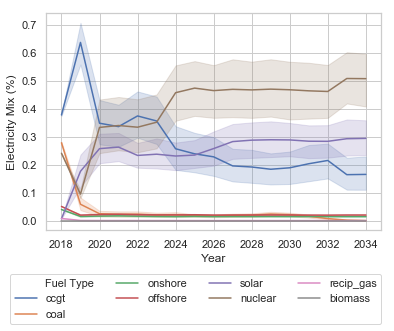

In [85]:
# per_year_dat = get_projection_difference_sum(frame)

# per_year_long = per_year_dat.melt(['year','fuel_type'])
# per_year_long

# demand_scenario = frame[frame.demand_scenario==i]
per_year_dat = frame.groupby("iteration").apply(lambda x: get_projection_difference_sum(x))

per_year_long = per_year_dat.melt(['year','fuel_type'])
per_year_long = per_year_long.rename(columns = {'fuel_type':"Fuel Type"})
# print("demand scenario: "+i)

#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#     plt.show()
#     plt.close()



sns.set(font_scale=1)
sns.set_style("whitegrid")
g = sns.lineplot(data=per_year_long[per_year_long.variable=="simulated_perc"], x="year", y="value", hue="Fuel Type")
g.set(xlabel='Year', ylabel='Electricity Mix (%)')
lgd = plt.legend(bbox_to_anchor=(1,-0.2), borderaxespad=0., ncol=4)

# plt.show()
plt.savefig("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/carbon_tax_optimiser/notebooks/figures/uk_scenario_co2_strategy.pdf", dpi=1000, bbox_inches='tight')
# plt.close()



In [82]:
print("Carbon emitted")
frame.Carbon_emitted.mean()


Carbon emitted


975.1276947105115

In [84]:
print("Avg electricity price")
frame.Electricity_cost.mean()

Avg electricity price


46.5758063092744